In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv')


In [3]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [4]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']


In [5]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

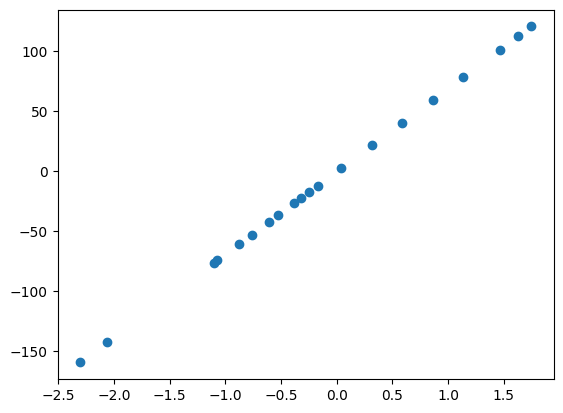

In [6]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [7]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    def fit(self, X, Y):
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153406


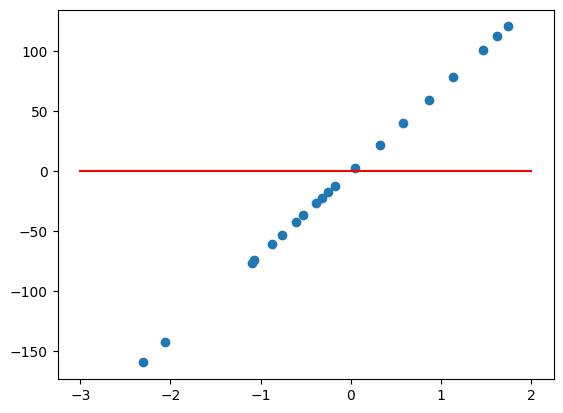

In [8]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [9]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2253.7456808918546


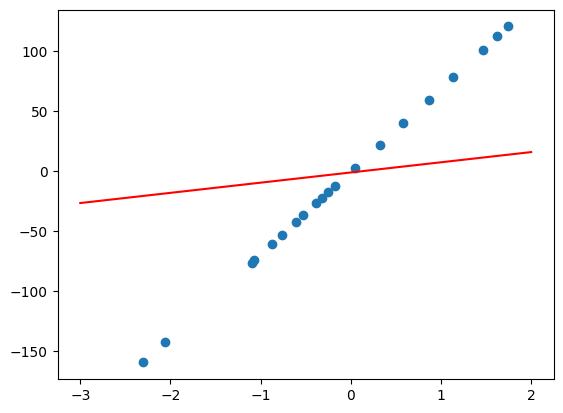

In [10]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [11]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [12]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.776975306057215e-06


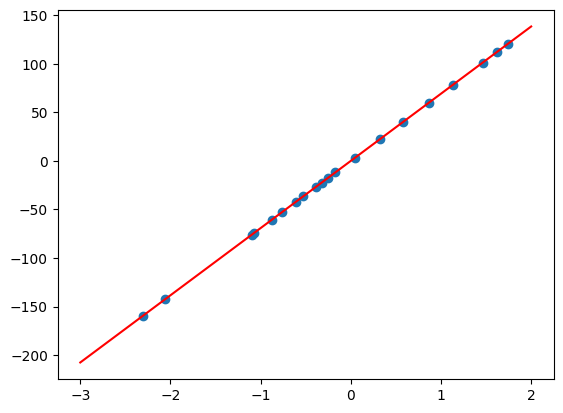

In [13]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

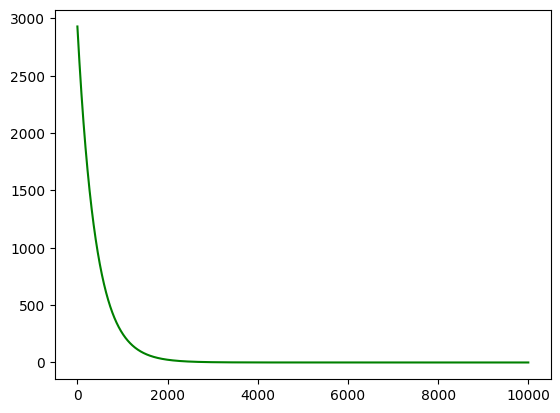

In [14]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

1.Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

2.Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

3.Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

4.Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

5.Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

6.Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

7.Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

1.Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

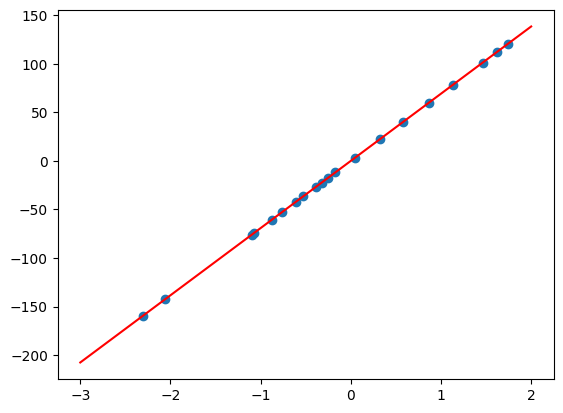

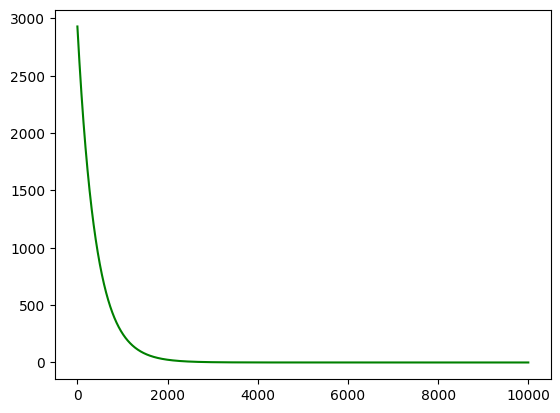

In [15]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

2.Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

alpha = 0.001 error after gradient descent: 2.776975306057215e-06


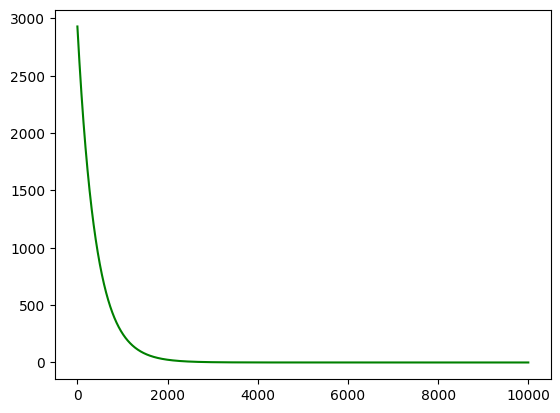

alpha = 0.01 error after gradient descent: 2.006036254818294e-25


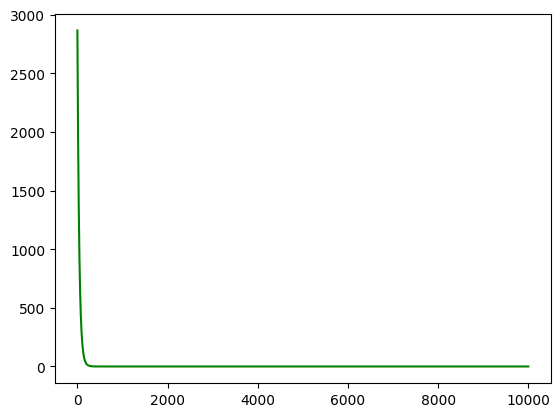

alpha = 0.1 error after gradient descent: 1.6583631164782415e-27


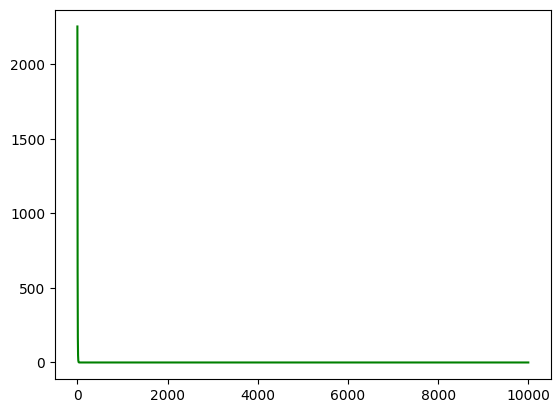

alpha = 1 error after gradient descent: 3.0967720910582346e-29


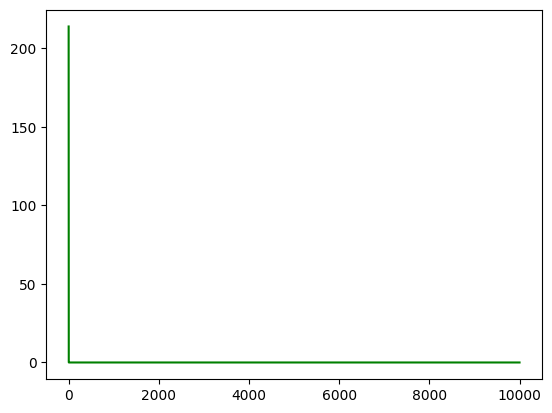

alpha = 2 error after gradient descent: nan


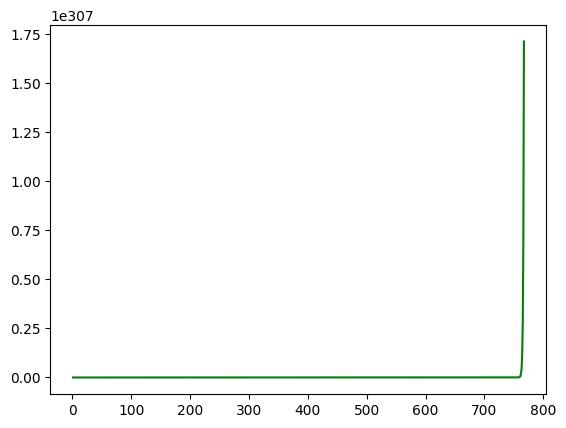

alpha = 5 error after gradient descent: nan


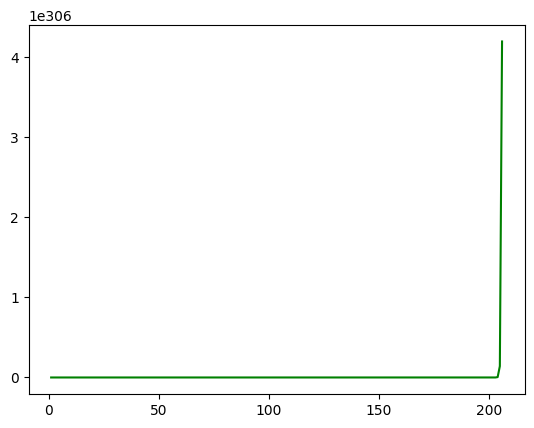

alpha = 10 error after gradient descent: nan


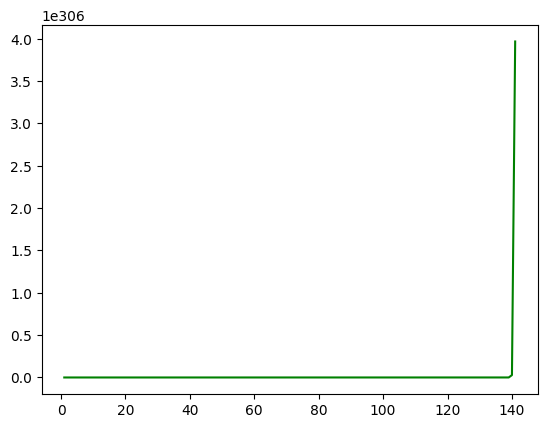

In [16]:
alphas = [0.001, 0.01, 0.1, 1,2,5,10]
for alpha in alphas:
    hyp = Model()
    steps, errors = hyp.fit(x, y, alpha=alpha)
    J = hyp.error(x, y)
    print("alpha =", alpha, "error after gradient descent:", J)
    plt.figure()
    plt.plot(steps, errors, 'g')
    plt.show()

3.Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [37]:
class Model2(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        if isinstance(X, pd.Series):
            return self.b0 + self.b1 * X
        elif isinstance(X, pd.DataFrame):
            return self.b0 + self.b1 * X['0']
        else:
            raise TypeError()

    def error(self, X, Y):
        if isinstance(X, pd.Series) and isinstance(Y, pd.Series):
            return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
        elif isinstance(X, pd.DataFrame) and isinstance(Y, pd.DataFrame):
            return sum(((self.predict(X['0']) - Y['0'])**2) / (2 * len(X['0'])))
        else:
            raise TypeError()
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            if isinstance(X, pd.Series) and isinstance(Y, pd.Series):
                dJ0 = sum(self.predict(X) - Y) /len(X)
                dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            elif isinstance(X, pd.DataFrame) and isinstance(Y, pd.DataFrame):
                dJ0 = sum(self.predict(X['0']) - Y['0']) /len(X['0'])
                dJ1 = sum((self.predict(X['0']) - Y['0']) * X['0']) /len(X['0'])
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

hyp = Model2()
hyp.b0 = 0
hyp.b1 = 0
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.776975306057215e-06


4.Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [34]:
class Model3(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        if isinstance(X, pd.Series):
            return self.b0 + self.b1 * X
        elif isinstance(X, pd.DataFrame):
            return self.b0 + self.b1 * X['0']
        else:
            raise TypeError()

    def error(self, X, Y):
        if isinstance(X, pd.Series) and isinstance(Y, pd.Series):
            return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
        elif isinstance(X, pd.DataFrame) and isinstance(Y, pd.DataFrame):
            return sum(((self.predict(X['0']) - Y['0'])**2) / (2 * len(X['0'])))
        else:
            raise TypeError()
    def fit(self, X, Y, alpha=0.001, accuracy=0.000001, max_steps=5000):
        steps, errors = [], []
        prev_err = float('inf')
        step = 0
        while step<max_steps:
            if isinstance(X, pd.Series) and isinstance(Y, pd.Series):
                dJ0 = sum(self.predict(X) - Y) /len(X)
                dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            elif isinstance(X, pd.DataFrame) and isinstance(Y, pd.DataFrame):
                dJ0 = sum(self.predict(X['0']) - Y['0']) /len(X['0'])
                dJ1 = sum((self.predict(X['0']) - Y['0']) * X['0']) /len(X['0'])
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if abs(prev_err - new_err) < accuracy:
                break
            prev_err = new_err
        return steps, errors

In [35]:
hyp = Model3()
hyp.b0 = 0
hyp.b1 = 0
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 0.03937321303112907


5.Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

In [36]:
hyp = Model3()
hyp.b0 = 0
hyp.b1 = 0
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print(steps[-1])

5000


6.Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

7.Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

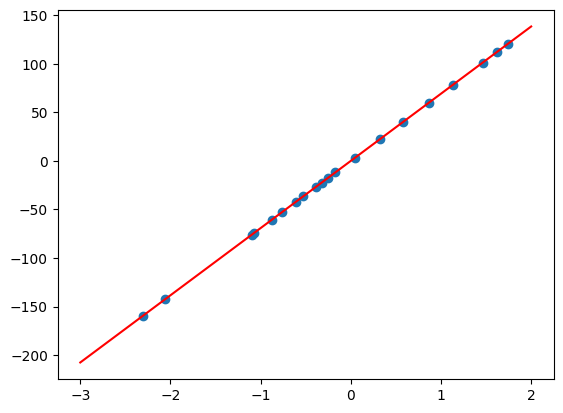

error after gradient descent: 1.9322688565990425e-14


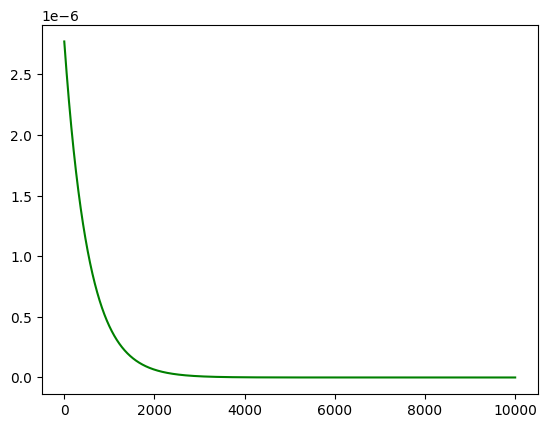

In [38]:
class Model5(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

    def plot(self, X, Y):
        X0 = np.linspace(-3, 2, 100)
        Y0 = self.predict(X0)
        plt.figure()
        plt.scatter(X, Y)
        plt.plot(X0, Y0, 'r')
        plt.show()
        steps, errors = self.fit(X, Y, alpha=0.001)
        J = self.error(x, y)
        print("error after gradient descent:", J)
        plt.figure()
        plt.plot(steps, errors, 'g')
        plt.show()

hyp = Model5()
hyp.b0 = 0
hyp.b1 = 0
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
hyp.plot(x, y)